# Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Dataset Description:
Variable:	Description

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under 
Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status:	Loan approved (Y/N)

# Import Libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Reading the file

In [52]:
train_df = pd.read_csv('/content/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train_df.drop('Loan_ID',axis=1,inplace = True)

## Checking categorical and Numerical columns

In [55]:
categorical_columns = [x for x in train_df.columns if train_df[x].dtypes == 'O']

In [56]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [57]:
numerical_columns = [x for x in train_df.columns if train_df[x].dtypes != 'O']

In [58]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [59]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
train_df.shape

(614, 12)

## Treating Missing values

In [61]:
#Treating Gender Missing Values

train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].dropna().mode().values[0])

#Treating Married Missing Values

train_df['Married'] = train_df['Married'].fillna(train_df['Married'].dropna().mode().values[0])

#Treating Dependents Missing Values

train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].dropna().mode().values[0])

#Treating Self_Employed Missing Values

train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].dropna().mode().values[0])



In [62]:
train_df['LoanAmount'].mean()

146.41216216216216

In [63]:
train_df['LoanAmount'].median()

128.0

In [64]:
train_df['Loan_Amount_Term'].mean()

342.0

In [65]:
train_df['Loan_Amount_Term'].median()

360.0

In [66]:
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [67]:
#Treating LoanAmount Missing Values

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].dropna().median())

#Treating Loan_Amount_Term Missing Values

train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].dropna().mean())

#Treating Credit_History Missing Values

train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].dropna().mode().values[0])

In [68]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualize Categorical

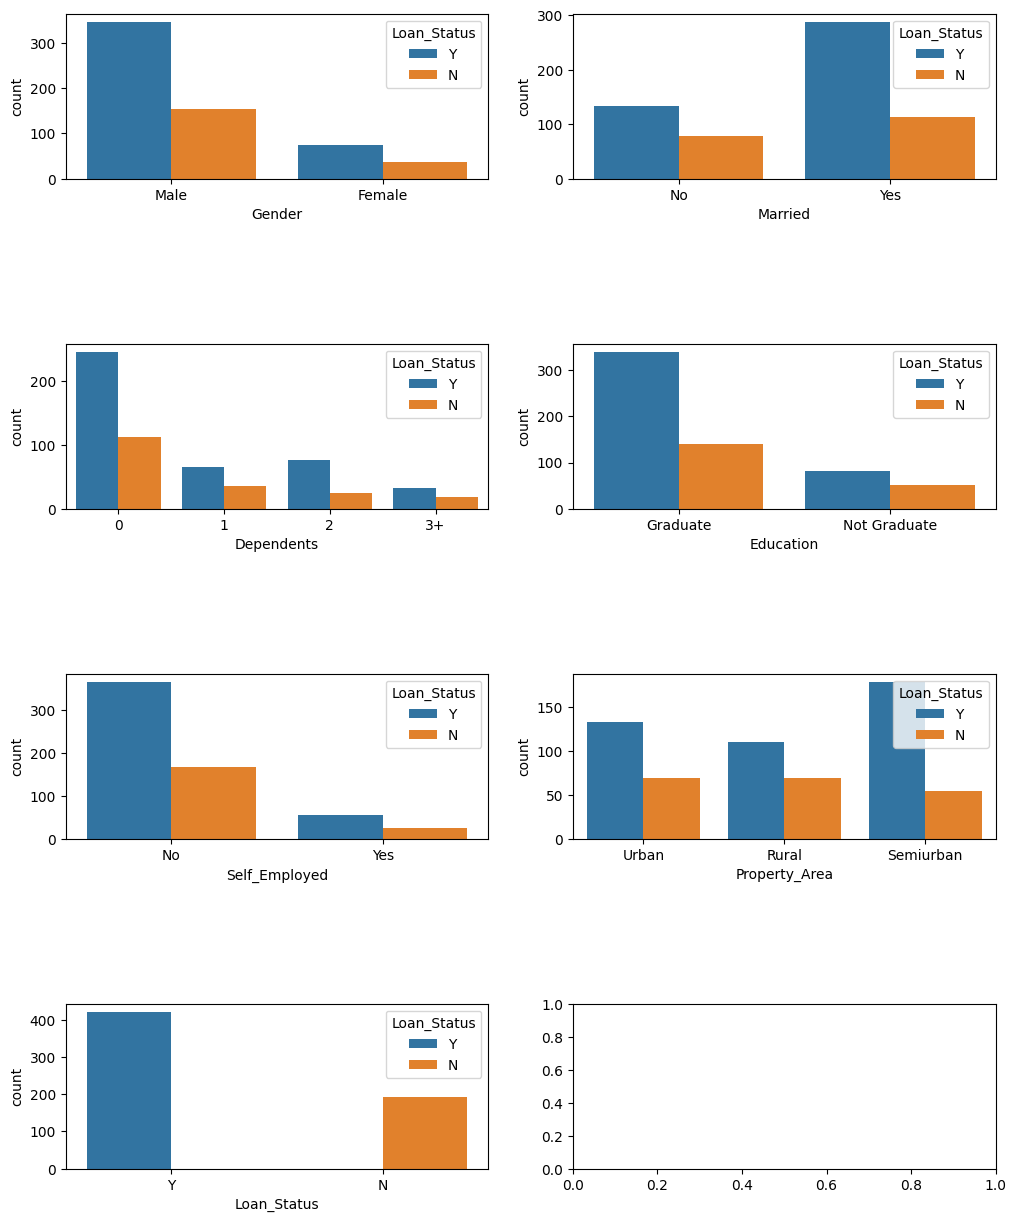

In [69]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

# Visualize numerical

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.000000   
std        6109.041673        2926.248369   84.107233         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


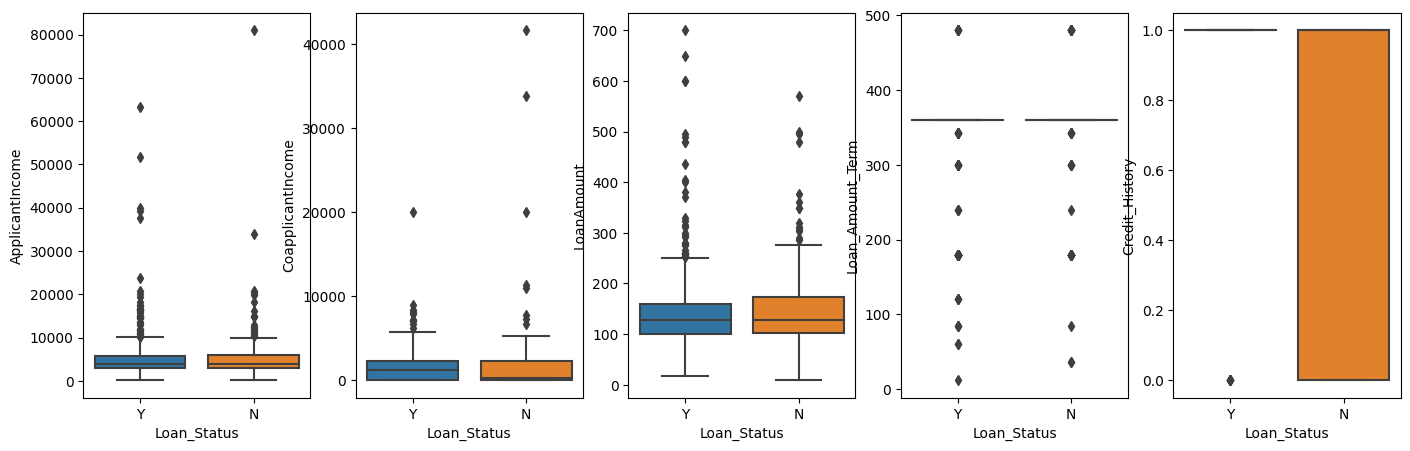

In [70]:
fig,axes = plt.subplots(1,5,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Handling Categorical columns

In [71]:
#Treating Target

train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1,'N':0}).astype(int)

# Correlation matrix

<Axes: >

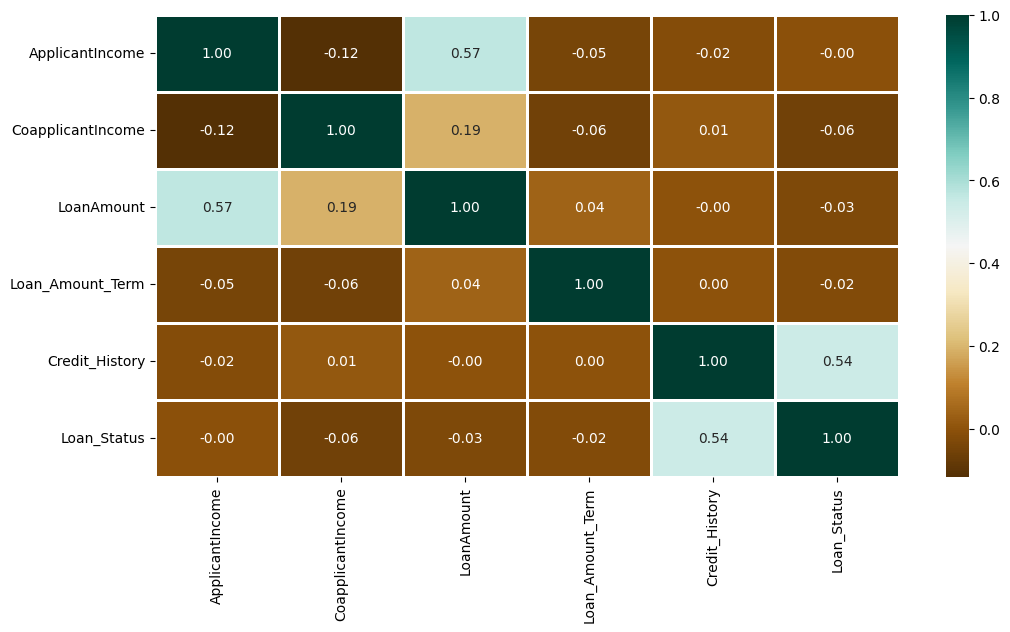

In [72]:
plt.figure(figsize=(12,6))
  
sns.heatmap(train_df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

Credit history and loan status has correlated well

# One Hot encoding for categorical fetaures.

In [73]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
train_df_new = train_df.copy()

In [75]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

In [76]:
for i in cat_cols:
    print(i,sorted(train_df_new[i].unique()))

Gender ['Female', 'Male']
Married ['No', 'Yes']
Dependents ['0', '1', '2', '3+']
Education ['Graduate', 'Not Graduate']
Self_Employed ['No', 'Yes']
Credit_History [0.0, 1.0]
Property_Area ['Rural', 'Semiurban', 'Urban']


In [77]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
train_df_encoded = ohe.fit_transform(train_df_new[cat_cols]).toarray()

train_df_encoded

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [78]:
train_df_new=train_df_new.drop(cat_cols,axis=1)
print(train_df_new.shape)

(614, 5)


In [80]:
ohe.get_feature_names_out(train_df[cat_cols].columns)

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Credit_History_0.0', 'Credit_History_1.0',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'], dtype=object)

In [81]:
train_df_new=pd.concat([train_df_new,pd.DataFrame(train_df_encoded, columns=ohe.get_feature_names_out(train_df[cat_cols].columns))],axis =1)

In [82]:
train_df_new.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
609,2900,0.0,71.0,360.0,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
610,4106,0.0,40.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
611,8072,240.0,253.0,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
612,7583,0.0,187.0,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
613,4583,0.0,133.0,360.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Check for class imbalance.

In [83]:
round(train_df_new.Loan_Status.value_counts()/train_df_new.shape[0]*100,2)

1    68.73
0    31.27
Name: Loan_Status, dtype: float64

There is an imbalance in the class. We can try using the smote

In [84]:
X=train_df_new.drop('Loan_Status',axis=1)
Y=train_df_new.Loan_Status

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(552, 21) (62, 21) (552,) (62,)


In [87]:
Y_train.value_counts()

1    381
0    171
Name: Loan_Status, dtype: int64

In [89]:
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)

In [91]:
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [92]:
Y_train.value_counts()

0    381
1    381
Name: Loan_Status, dtype: int64

In [93]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,6633,0.0,128.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,7142,0.0,138.0,360.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3100,1400.0,113.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000,0.0,156.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3750,2083.0,120.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Scaling the data

In [97]:
ss2=StandardScaler()
X_train_scaled=pd.DataFrame(ss2.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(ss2.transform(X_test),columns=X_test.columns)
print(X_train_scaled.shape,X_test_scaled.shape)

(762, 21) (62, 21)


# Model Building

In [102]:
logit=LogisticRegression()
logit.fit(X_train,Y_train)
print(logit)
Y_pred_logit=logit.predict(X_test)
f1_logit=f1_score(Y_test,Y_pred_logit)*100
print(f1_logit)

LogisticRegression()
85.39325842696628


In [105]:
classification_report(Y_test,Y_pred_logit)

'              precision    recall  f1-score   support\n\n           0       0.79      0.52      0.63        21\n           1       0.79      0.93      0.85        41\n\n    accuracy                           0.79        62\n   macro avg       0.79      0.73      0.74        62\nweighted avg       0.79      0.79      0.78        62\n'

              precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.79      0.93      0.85        41

    accuracy                           0.79        62
   macro avg       0.79      0.73      0.74        62
weighted avg       0.79      0.79      0.78        62


In [106]:
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=4)
rf.fit(X_train,Y_train)
print(rf)

Y_pred_rf=rf.predict(X_test)
f1_rf=f1_score(Y_test,Y_pred_rf)*100
print(f1_rf)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=42)
84.21052631578947


In [107]:
classification_report(Y_test,Y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.88      0.33      0.48        21\n           1       0.74      0.98      0.84        41\n\n    accuracy                           0.76        62\n   macro avg       0.81      0.65      0.66        62\nweighted avg       0.79      0.76      0.72        62\n'

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62


In [108]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train);print(GNB)

Y_pred_GNB = GNB.predict(X_test)
f1_GNB=f1_score(Y_test,Y_pred_GNB)*100
print(f1_GNB)

GaussianNB()
84.21052631578947


In [109]:
classification_report(Y_test,Y_pred_GNB)

'              precision    recall  f1-score   support\n\n           0       0.88      0.33      0.48        21\n           1       0.74      0.98      0.84        41\n\n    accuracy                           0.76        62\n   macro avg       0.81      0.65      0.66        62\nweighted avg       0.79      0.76      0.72        62\n'

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62


In [110]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train);print(svc)

Y_pred_svc = svc.predict(X_test)
f1_svc=f1_score(Y_test,Y_pred_svc)*100
print(f1_svc)

SVC(kernel='linear')
81.72043010752688


In [111]:
classification_report(Y_test,Y_pred_svc)

'              precision    recall  f1-score   support\n\n           0       0.70      0.33      0.45        21\n           1       0.73      0.93      0.82        41\n\n    accuracy                           0.73        62\n   macro avg       0.72      0.63      0.63        62\nweighted avg       0.72      0.73      0.69        62\n'

              precision    recall  f1-score   support

           0       0.70      0.33      0.45        21
           1       0.73      0.93      0.82        41

    accuracy                           0.73        62
   macro avg       0.72      0.63      0.63        62
weighted avg       0.72      0.73      0.69        62


# Hyper parameter Tuning

In [115]:
# Random Forest

grid_rf = {
    'max_depth' : range(4,10),
    'min_samples_leaf' : range(10,50,10),
    'n_estimators' : range(100,300,100)
}
n_folds = 5
rf = RandomForestClassifier(random_state = 42)
rf_grid = GridSearchCV(rf,grid_rf,cv=n_folds,return_train_score = True, verbose=0)
rf_grid.fit(X_train, Y_train)
print(rf_grid.best_params_)

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 200}


In [116]:
print(rf_grid.best_score_)

0.8454592363261094


In [117]:
model_rf = rf_grid.best_estimator_

In [118]:
model_rf

RandomForestClassifier(max_depth=7, min_samples_leaf=10, n_estimators=200,
                       random_state=42)

In [119]:
rf

RandomForestClassifier(random_state=42)

In [120]:
import pickle
with open('loan_application.pickle','wb') as f:
    pickle.dump(model_rf,f)